In [1]:
import os
from google.colab import drive
drive.mount('/content/drive', force_remount = True)
os.chdir('/content/drive/My Drive/assignment06')
!pwd

Mounted at /content/drive
/content/drive/My Drive/assignment06


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

from keras import layers, models
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import (
    Dense, Dropout, Activation,
    Conv2D, MaxPooling2D, Flatten,
    BatchNormalization
)
from keras.utils import np_utils, to_categorical
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

In [3]:
(trainX, trainy), (testX, testy) = cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [4]:
# get the size of the data sets
print(f'train_images: {trainX.shape}')
print(f'test_images: {testX.shape}')
print(f'train_labels: {trainy.shape}')
print(f'test_labels: {testy.shape}')

train_images: (50000, 32, 32, 3)
test_images: (10000, 32, 32, 3)
train_labels: (50000, 1)
test_labels: (10000, 1)


In [5]:
# Assignment classes for visualization
cifar10_classes = ['airplane', 'automobile', 'bird', 'cat',
                   'deer', 'frog', 'horse', 'ship', 'truck']

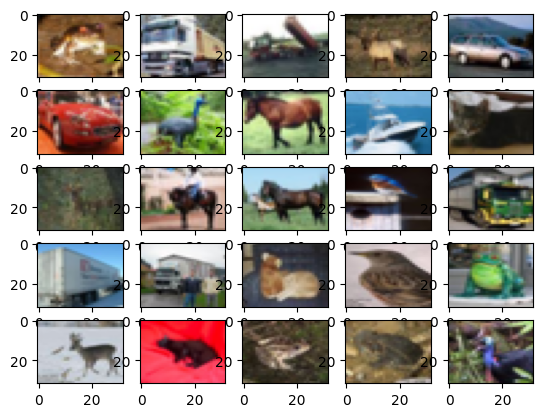

In [6]:
fig, ax = plt.subplots(5, 5)
k = 0

for i in range(5):
  for j in range(5):
    ax[i][j].imshow(trainX[k], aspect = 'auto')
    k += 1

plt.show()

In [7]:
# normalize datasets
train_images = trainX.astype('float32') / 255.0
test_images = testX.astype('float32') / 255.0

In [8]:
# convert labels to numeric
train_labels = to_categorical(trainy)
test_labels = to_categorical(testy)

In [9]:
x_val = train_images[:10000]
partial_x_train = train_images[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [10]:
# get the size of the data sets
print(f'x_val: {x_val.shape}')
print(f'y_val: {y_val.shape}')
print(f'partial_x_train: {partial_x_train.shape}')
print(f'partial_y_train: {partial_y_train.shape}')

x_val: (10000, 32, 32, 3)
y_val: (10000, 10)
partial_x_train: (40000, 32, 32, 3)
partial_y_train: (40000, 10)


In [11]:
# Instantiate a convnet
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                        

In [13]:
opt = SGD(lr = 0.001, momentum = 0.9)

model.compile(loss = 'categorical_crossentropy',
              optimizer = opt,
              metrics = ['accuracy'])

/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [14]:
# create data generator
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)

# prepare iterator
it_train = datagen.flow(partial_x_train, partial_y_train, batch_size=64)

steps = int(partial_x_train.shape[0] / 64)

In [15]:
history = model.fit(it_train, steps_per_epoch = steps, 
                    epochs = 200, validation_data = (x_val, y_val), verbose = 1)

Epoch 1/200
625/625 [==============================] - 37s 43ms/step - loss: 2.2390 - accuracy: 0.2773 - val_loss: 1.4819 - val_accuracy: 0.4563
Epoch 2/200
625/625 [==============================] - 27s 43ms/step - loss: 1.6876 - accuracy: 0.3858 - val_loss: 1.4434 - val_accuracy: 0.4660
Epoch 3/200
625/625 [==============================] - 27s 42ms/step - loss: 1.5673 - accuracy: 0.4257 - val_loss: 1.4193 - val_accuracy: 0.4822
Epoch 4/200
625/625 [==============================] - 27s 43ms/step - loss: 1.4959 - accuracy: 0.4534 - val_loss: 1.4184 - val_accuracy: 0.4814
Epoch 5/200
625/625 [==============================] - 27s 43ms/step - loss: 1.4490 - accuracy: 0.4730 - val_loss: 1.3417 - val_accuracy: 0.5058
Epoch 6/200
625/625 [==============================] - 28s 44ms/step - loss: 1.4048 - accuracy: 0.4893 - val_loss: 1.3335 - val_accuracy: 0.5106
Epoch 7/200
625/625 [==============================] - 27s 43ms/step - loss: 1.3639 - accuracy: 0.5065 - val_loss: 1.3312 - val_ac

FileNotFoundError: ignored

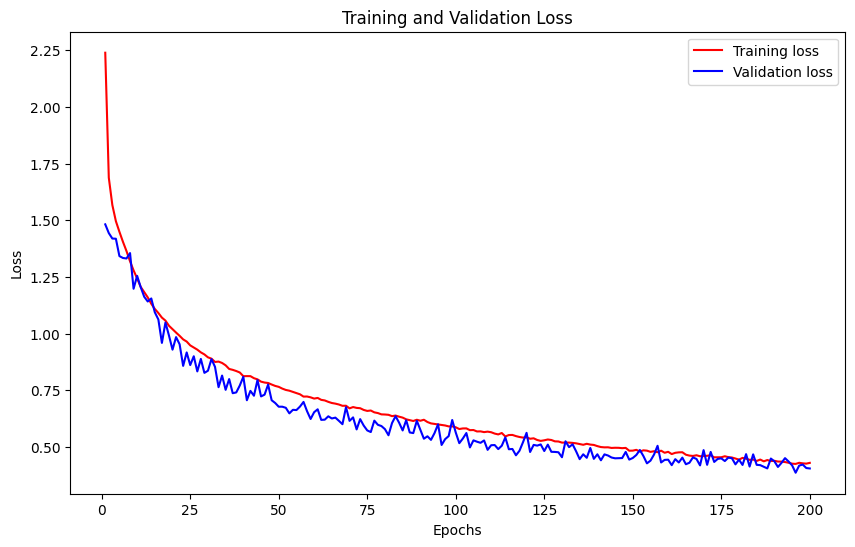

In [24]:
plt.figure(figsize = (10, 6))

loss_values = history.history['loss']
val_loss_values = history.history['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'r', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()

fig = plt.gcf()
fig.savefig('results/CIFGAR10/yes/train_val_loss.png')

plt.show()

FileNotFoundError: ignored

<Figure size 640x480 with 0 Axes>

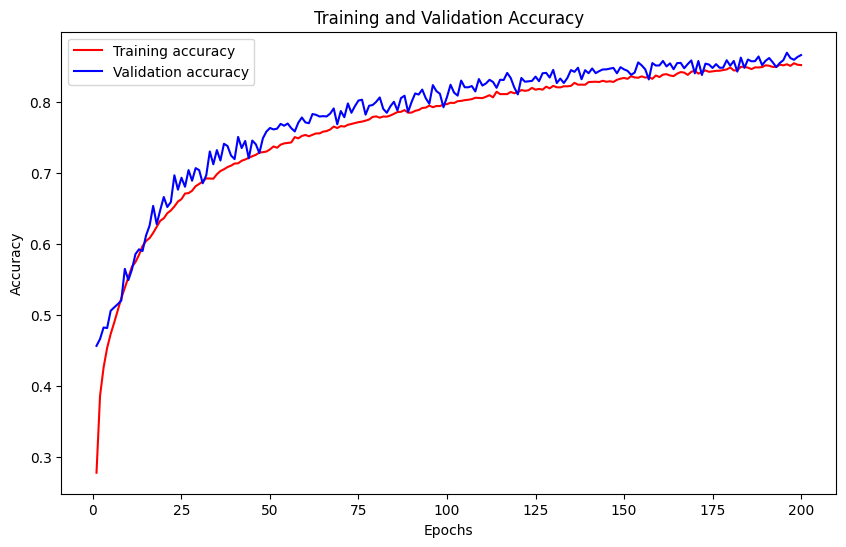

In [25]:
plt.clf()

plt.figure(figsize = (10, 6))

acc_values = history.history['accuracy']
val_acc_values = history.history['val_accuracy']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, acc_values, 'r', label = 'Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation accuracy')

plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend()

fig = plt.gcf()
fig.savefig('results/CIFGAR10/yes/train_val_accuracy.png')

plt.show()

In [18]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.4434 - accuracy: 0.8573


In [19]:
print(f'Test accuracy: {test_acc * 100:.1f}%')
print(f'Test loss: {test_loss:.3f}')

Test accuracy: 85.7%
Test loss: 0.443


In [20]:
label_pred_test = model.predict(test_images)
label_pred_test_classes = np.argmax(label_pred_test, axis = 1)
label_pred_test_max_probability = np.max(label_pred_test, axis = 1)

313/313 [==============================] - 1s 2ms/step


In [21]:
# Reverse test_labels from categorical
test_labels = np.argmax(test_labels, axis = 1)

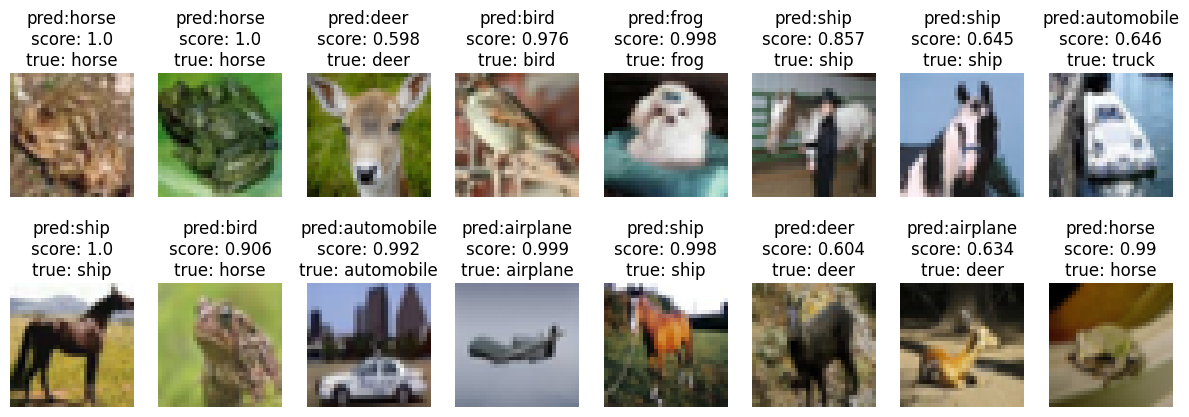

In [23]:
cols = 8
rows = 2

fig = plt.figure(figsize = (2 * cols - 1, 3 * rows - 1))

for i in range(cols):
  for j in range(rows):
    random_index = np.random.randint(0, len(test_labels))

    ax = fig.add_subplot(rows, cols, i * rows + j + 1)

    ax.grid('off')
    ax.axis('off')

    ax.imshow(test_images[random_index, :])

    pred_label = cifar10_classes[label_pred_test_classes[random_index]]
    pred_probability = label_pred_test_max_probability[random_index]

    true_label = cifar10_classes[test_labels[random_index]]

    ax.set_title(f'pred:{pred_label}\nscore: {pred_probability:.3}\ntrue: {true_label}')

In [26]:
model.save('results/CIFGAR10/yes/mnist.h5', history)

In [27]:
pickle.dump({'test_accuracy': test_acc, 
            'test_loss': test_loss, 
            'history_dict': history.history},
            open("results/CIFGAR10/yes/training_metrics", "wb"))